In [1]:
%load_ext autoreload
%autoreload 2

import time 
import requests
import base64
import pygame 
import threading
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import sys
import os
import json

import utils 
BASE_URL = "http://localhost:8000"

pygame 2.6.0 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


# USING AGENTLACE

# OLD STUFF

In [3]:
## HELPER FUNCTIONS

def decode_from_base64(base64_string):
    image = Image.open(BytesIO(base64.b64decode(base64_string)))
    return image

def get_images():
    url = f"{BASE_URL}/screenshot?view_types=rear,map,front"

    response = requests.get(url) 
    response = response.json()

    front_frame = decode_from_base64(response["front_frame"])
    rear_frame = decode_from_base64(response["rear_frame"])
    time = response["timestamp"]
    
    return front_frame, rear_frame, time

Text(0.5, 1.0, '1727508231.73018')

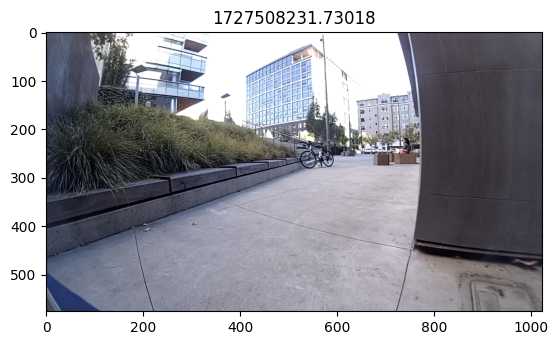

In [20]:
## GET PICTURE AND VISUALIZE
front_img, rear_img, capture_time = get_images()
plt.imshow(front_img)
plt.title(capture_time)

In [14]:
## SAVE A TON OF PICTURES

record_time = 60
start_time = time.time()
old_time = 0
tick_rate = 1/3

while time.time() - start_time < record_time:

    front_img, rear_img, capture_time = get_images()

    if old_time != capture_time: # received new images
        front_img.save(f"front/{capture_time}_front.png")
        # rear_img.save(f"back/{capture_time}_rear.png")

        old_time = capture_time
    time.sleep(tick_rate)
    

In [9]:
utils.send_velocity_command("http://localhost:8000", 0.2, 0.2)

Linear:  0.2 Angular:  0.2


True

In [15]:

base_url = "http://localhost:8000"
url = f"{base_url}/screenshot"

response = requests.get(url) 
response = response.json()

front_frame = self.decode_from_base64(response["front_frame"])
rear_frame = self.decode_from_base64(response["rear_frame"])
map_frame = self.decode_from_base64(response["map_frame"])
timestamp = response["timestamp"]

NameError: name 'self' is not defined